In [594]:
import pandas as pd

In [595]:
#Load the data file using pandas.
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [596]:
#Check for null values in the data. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [597]:
#Get the number of null values for each column.
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [598]:
#Check duplicate rows
df.duplicated().sum()

483

In [599]:
#drop duplicate rows
df.drop_duplicates(inplace=True)

In [600]:
df.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [601]:
# Drop records with nulls in any of the columns. 
df.dropna(inplace=True)

In [602]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


In [603]:
# Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
df.Size.value_counts()

Varies with device    1468
14M                    153
13M                    152
12M                    151
15M                    149
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64

In [604]:
# Extract the numeric value from the column and Multiply the value by 1,000, if size is mentioned in Mb
# Define the conversion function
def convert_size(size_str):
    if 'K' in size_str:
        return float(size_str.replace('K', '').strip())
    elif 'M' in size_str:
        return float(size_str.replace('M', '').strip()) * 1000
    elif 'Varies with device' in size_str:
        return None  # You can replace this with another suitable value or handling method
    else:
        return None  # Handle other cases if needed

# Apply the function to the 'Size' column
df['Size_numeric'] = df['Size'].apply(convert_size)

# Drop rows with 'Varies with device'
df.dropna(subset=['Size_numeric'], inplace=True)


In [605]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_numeric
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8700.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2800.0


In [606]:
df.drop('Size', axis=1, inplace=True)

In [607]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_numeric
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8700.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2800.0


In [608]:
# This step is not relevant but I just wanted to bring the column Size to where the previous column Size which I dropped earlier was
# Get the name of the column you want to move
column_to_move = 'Size_numeric'

# Get the current column order
current_columns = df.columns.tolist()

# Remove the column from the list
current_columns.remove(column_to_move)

# Insert the column at the 4th position (index 3 in zero-based indexing)
desired_position = 4
current_columns.insert(desired_position, column_to_move)

# Reorder the DataFrame columns
df = df[current_columns]

In [609]:
# renaming the Size_numeric column to Size
df.rename(columns={'Size_numeric': 'Size(K)'},inplace = True)

In [610]:
#converting size data type to integer
df["Size(K)"] = df['Size(K)'].astype('int')

In [611]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7162 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7162 non-null   object 
 1   Category        7162 non-null   object 
 2   Rating          7162 non-null   float64
 3   Reviews         7162 non-null   object 
 4   Size(K)         7162 non-null   int32  
 5   Installs        7162 non-null   object 
 6   Type            7162 non-null   object 
 7   Price           7162 non-null   object 
 8   Content Rating  7162 non-null   object 
 9   Genres          7162 non-null   object 
 10  Last Updated    7162 non-null   object 
 11  Current Ver     7162 non-null   object 
 12  Android Ver     7162 non-null   object 
dtypes: float64(1), int32(1), object(11)
memory usage: 755.4+ KB


In [612]:
# Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).
df["Reviews"] = pd.to_numeric(df["Reviews"])

In [613]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7162 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7162 non-null   object 
 1   Category        7162 non-null   object 
 2   Rating          7162 non-null   float64
 3   Reviews         7162 non-null   int64  
 4   Size(K)         7162 non-null   int32  
 5   Installs        7162 non-null   object 
 6   Type            7162 non-null   object 
 7   Price           7162 non-null   object 
 8   Content Rating  7162 non-null   object 
 9   Genres          7162 non-null   object 
 10  Last Updated    7162 non-null   object 
 11  Current Ver     7162 non-null   object 
 12  Android Ver     7162 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(10)
memory usage: 755.4+ KB


In [614]:
# Installs field is currently stored as string and has values like 1,000,000+. 
# removing non alphanumeric values by Treating 1,000,000+ as 1,000,000
df['Installs'] = df.Installs.str.replace('[^a-zA-Z0-9]', " ")

#remove ‘+’, ‘,’ from the field, convert it to integer
df['Installs'] = df['Installs'].str.replace(' ', '')
df["Installs"] = pd.to_numeric(df["Installs"])


C:\Users\User\AppData\Local\Temp\ipykernel_6608\3193049693.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Installs'] = df.Installs.str.replace('[^a-zA-Z0-9]', " ")


In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7162 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7162 non-null   object 
 1   Category        7162 non-null   object 
 2   Rating          7162 non-null   float64
 3   Reviews         7162 non-null   int64  
 4   Size(K)         7162 non-null   int32  
 5   Installs        7162 non-null   int64  
 6   Type            7162 non-null   object 
 7   Price           7162 non-null   object 
 8   Content Rating  7162 non-null   object 
 9   Genres          7162 non-null   object 
 10  Last Updated    7162 non-null   object 
 11  Current Ver     7162 non-null   object 
 12  Android Ver     7162 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(9)
memory usage: 755.4+ KB


In [616]:
# Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.
df['Price'] = df.Price.str.replace('[^a-zA-Z0-9]', " ")

df['Price'] = df['Price'].str.replace(' ', '')
df["Price"] = pd.to_numeric(df["Price"])


C:\Users\User\AppData\Local\Temp\ipykernel_6608\727579541.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Price'] = df.Price.str.replace('[^a-zA-Z0-9]', " ")


In [617]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7162 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7162 non-null   object 
 1   Category        7162 non-null   object 
 2   Rating          7162 non-null   float64
 3   Reviews         7162 non-null   int64  
 4   Size(K)         7162 non-null   int32  
 5   Installs        7162 non-null   int64  
 6   Type            7162 non-null   object 
 7   Price           7162 non-null   int64  
 8   Content Rating  7162 non-null   object 
 9   Genres          7162 non-null   object 
 10  Last Updated    7162 non-null   object 
 11  Current Ver     7162 non-null   object 
 12  Android Ver     7162 non-null   object 
dtypes: float64(1), int32(1), int64(3), object(8)
memory usage: 755.4+ KB


In [618]:
#Average rating should be between 1 and 5 as only these values are allowed on the play store. 
#Drop the rows that have a value outside this range.
df.Rating.value_counts()

4.4    771
4.3    763
4.5    755
4.2    684
4.6    605
4.1    531
4.0    436
4.7    410
3.9    301
5.0    258
3.8    247
4.8    207
3.7    186
3.6    142
3.5    138
3.4    110
3.3     90
4.9     85
3.0     68
3.1     58
3.2     57
2.9     41
2.8     38
2.6     22
2.7     20
2.3     20
2.4     17
2.5     16
1.0     16
2.2     14
1.9     11
2.0     11
1.7      8
2.1      8
1.8      7
1.6      4
1.4      3
1.5      3
1.2      1
Name: Rating, dtype: int64

In [619]:
# Reviews should not be more than installs as only those who installed can review the app. 
#If there are any such records, drop them.
df.Reviews.sum()

2067974522

In [620]:
df.Installs.sum()

57954698248

In [621]:
# For free apps (type = “Free”), the price should not be >0. Drop any such rows.
df[['Type','Price']].value_counts()

Type  Price
Free  0        6667
Paid  299        95
      99         92
      199        49
      499        48
               ... 
      150         1
      749         1
      849         1
      176         1
      40000       1
Length: 66, dtype: int64

In [622]:
df.Type.value_counts()

Free    6667
Paid     495
Name: Type, dtype: int64

5. Performing univariate analysis: 

In [623]:
#Performing univariate analysis:
import matplotlib.pyplot as plt

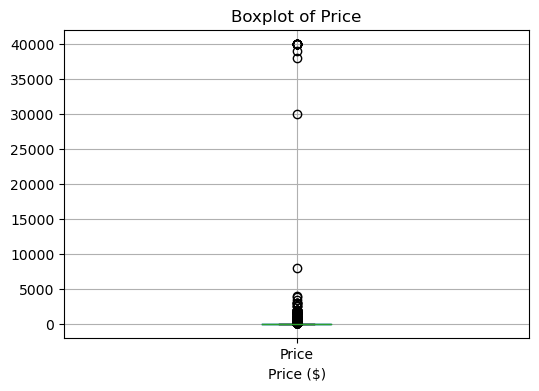

In [624]:
#Boxplot for Price
# Create a boxplot for the 'price' column
plt.figure(figsize=(6, 4))  # Optional: Adjust the figure size
df.boxplot(column='Price')

# Add labels and title
plt.xlabel('Price ($)')
plt.title('Boxplot of Price')

# Display the plot
plt.show()

#Are there any outliers? Think about the price of usual apps on Play Store.

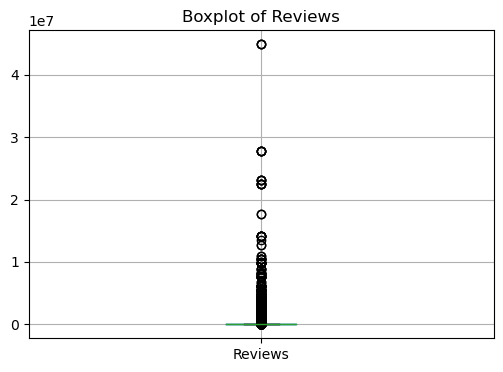

In [625]:
# Create a boxplot for the 'Review' column
plt.figure(figsize=(6, 4))  # Optional: Adjust the figure size
df.boxplot(column='Reviews')

# Add labels and title
plt.title('Boxplot of Reviews')

# Display the plot
plt.show()

#Are there any apps with very high number of reviews? Do the values seem right?

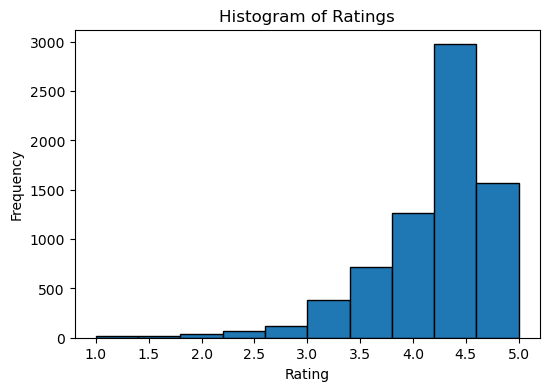

In [626]:
# Create a histogram for the 'rating' column
plt.figure(figsize=(6, 4))  # Optional: Adjust the figure size
plt.hist(df['Rating'], bins=10, edgecolor='k') 

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')

# Display the plot
plt.show()


# How are the ratings distributed? Is it more toward higher ratings?

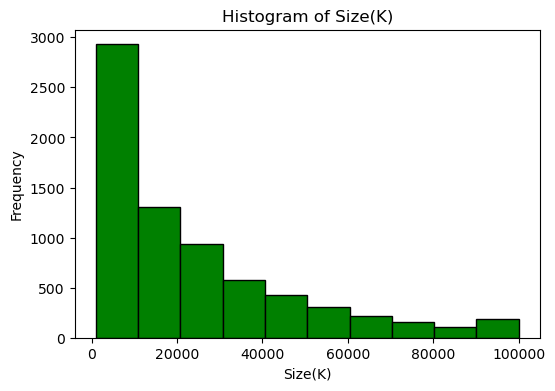

In [627]:
# Create a histogram for the 'Size' column
plt.figure(figsize=(6, 4))  # Optional: Adjust the figure size
plt.hist(df['Size(K)'], bins=10, edgecolor='k',color ='green') 

# Add labels and title
plt.xlabel('Size(K)')
plt.ylabel('Frequency')
plt.title('Histogram of Size(K)')

# Display the plot
plt.show()

Note down your observations for the plots made above. Which of these seem to have outliers?

6. Outlier treatment: 

Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

In [628]:
#Check out the records with very high price
#Is 200 indeed a high price?
# here I took my threshold value to be 200$
df.loc[df['Price'] > 200,:]

,App,Category,Rating,Reviews,Size(K),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800,100000,Paid,499,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000,100000,Paid,499,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
477,Calculator,DATING,2.6,57,6200,1000,Paid,699,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
481,AMBW Dating App: Asian Men Black Women Interra...,DATING,3.5,2,17000,100,Paid,799,Mature 17+,Dating,"January 21, 2017",1.0.1,4.0 and up
851,Sago Mini Hat Maker,EDUCATION,4.9,11,63000,1000,Paid,399,Everyone,Education;Pretend Play,"July 24, 2017",1.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10531,Kernel Manager for Franco Kernel ✨,TOOLS,4.8,12700,10000,100000,Paid,349,Everyone,Tools,"August 3, 2018",3.2.5,5.0 and up
10540,Ray Financial Calculator Pro,FINANCE,4.0,67,2400,10000,Paid,299,Everyone,Finance,"July 3, 2017",4,3.2 and up
10583,Florida Tides & Weather,WEATHER,3.8,30,2000,1000,Paid,699,Everyone,Weather,"May 6, 2015",2.0.0,2.3 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400,1000,Paid,799,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up


In [629]:
# Drop these as most seem to be junk apps
df = df[df['Price'] <= 200]

In [630]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6842 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             6842 non-null   object 
 1   Category        6842 non-null   object 
 2   Rating          6842 non-null   float64
 3   Reviews         6842 non-null   int64  
 4   Size(K)         6842 non-null   int32  
 5   Installs        6842 non-null   int64  
 6   Type            6842 non-null   object 
 7   Price           6842 non-null   int64  
 8   Content Rating  6842 non-null   object 
 9   Genres          6842 non-null   object 
 10  Last Updated    6842 non-null   object 
 11  Current Ver     6842 non-null   object 
 12  Android Ver     6842 non-null   object 
dtypes: float64(1), int32(1), int64(3), object(8)
memory usage: 721.6+ KB


Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [631]:
df.loc[df['Reviews'] > 2000000,:]

,App,Category,Rating,Reviews,Size(K),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
345,Yahoo Mail – Stay Organized,COMMUNICATION,4.3,4187998,16000,100000000,Free,0,Everyone,Communication,"July 18, 2018",5.29.3,4.4 and up
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11000,500000000,Free,0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
366,UC Browser Mini -Tiny Fast Private & Secure,COMMUNICATION,4.4,3648120,3300,100000000,Free,0,Teen,Communication,"July 18, 2018",11.4.0,4.0 and up
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000,500000000,Free,0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
383,imo free video calls and chat,COMMUNICATION,4.3,4785988,11000,500000000,Free,0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,Need for Speed™ No Limits,GAME,4.4,3344300,22000,50000000,Free,0,Everyone 10+,Racing,"July 24, 2018",2.12.1,4.1 and up
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000,100000000,Free,0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000,100000000,Free,0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000,10000000,Free,0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [632]:
# Drop records having more than 2 million reviews
df = df[df['Reviews'] <= 2000000]

In [633]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6636 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             6636 non-null   object 
 1   Category        6636 non-null   object 
 2   Rating          6636 non-null   float64
 3   Reviews         6636 non-null   int64  
 4   Size(K)         6636 non-null   int32  
 5   Installs        6636 non-null   int64  
 6   Type            6636 non-null   object 
 7   Price           6636 non-null   int64  
 8   Content Rating  6636 non-null   object 
 9   Genres          6636 non-null   object 
 10  Last Updated    6636 non-null   object 
 11  Current Ver     6636 non-null   object 
 12  Android Ver     6636 non-null   object 
dtypes: float64(1), int32(1), int64(3), object(8)
memory usage: 699.9+ KB


Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

In [634]:
# Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
# Define the percentiles you want to calculate
percentiles = [10,25,50,70,90,95,99]

# Calculate the percentiles
percentile_values = df['Installs'].quantile([p / 100 for p in percentiles])

# Display the percentile values
print(percentile_values)

0.10        1000.0
0.25       10000.0
0.50      100000.0
0.70     1000000.0
0.90    10000000.0
0.95    10000000.0
0.99    50000000.0
Name: Installs, dtype: float64


In [635]:
# Decide a threshold as cutoff for outlier and drop records having values more than that
df.loc[df['Installs'] > 10000000,:]

,App,Category,Rating,Reviews,Size(K),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000,100000000,Free,0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
225,Secure Folder,BUSINESS,3.8,14760,8600,50000000,Free,0,Everyone,Business,"January 31, 2018",1.1.07.6,7.0 and up
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35000,100000000,Free,0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
346,imo beta free calls and text,COMMUNICATION,4.3,659395,11000,100000000,Free,0,Everyone,Communication,"June 7, 2018",9.8.000000010492,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10378,BMX Boy,GAME,4.2,839206,12000,50000000,Free,0,Everyone,Racing,"September 20, 2017",1.16.33,4.1 and up
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27000,50000000,Free,0,Teen,Action,"August 8, 2018",1.1.2,4.1 and up
10429,Talking Tom Bubble Shooter,FAMILY,4.4,687136,54000,50000000,Free,0,Everyone,Casual,"May 25, 2018",1.5.3.20,4.1 and up
10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613,21000,50000000,Free,0,Everyone,Simulation,"March 1, 2017",1.32,2.3 and up


In [636]:
df = df[df['Installs'] <= 10000000]

In [637]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6467 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             6467 non-null   object 
 1   Category        6467 non-null   object 
 2   Rating          6467 non-null   float64
 3   Reviews         6467 non-null   int64  
 4   Size(K)         6467 non-null   int32  
 5   Installs        6467 non-null   int64  
 6   Type            6467 non-null   object 
 7   Price           6467 non-null   int64  
 8   Content Rating  6467 non-null   object 
 9   Genres          6467 non-null   object 
 10  Last Updated    6467 non-null   object 
 11  Current Ver     6467 non-null   object 
 12  Android Ver     6467 non-null   object 
dtypes: float64(1), int32(1), int64(3), object(8)
memory usage: 682.1+ KB


7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

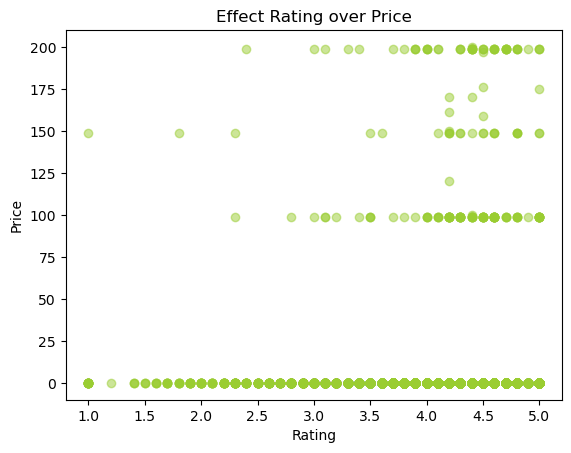

In [639]:
# Make scatter plot/joinplot for Rating vs. Price
# What pattern do you observe? Does rating increase with price?

plt.scatter(df.Rating, df.Price, color='yellowgreen', alpha=0.5)
plt.title('Effect Rating over Price')
plt.ylabel('Price')
plt.xlabel('Rating')
plt.show()

In [641]:
# Make scatter plot/joinplot for Rating vs. Size
# Are heavier apps rated better?

plt.scatter(df.Rating,df.Size(K), color='red')
plt.title('Effect Rating over Size(K)')
plt.ylabel('Rating')
plt.xlabel('Size(K))')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Size'

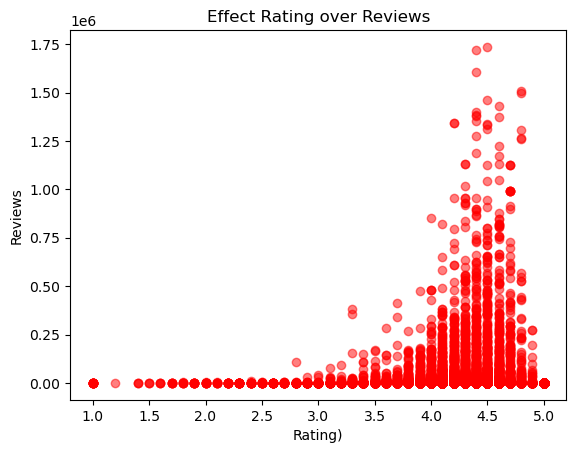

In [640]:
# Make scatter plot/joinplot for Rating vs. Reviews
# Does more review mean a better rating always?

plt.scatter(df.Rating,df.Reviews, color='red', alpha=0.5)
plt.title('Effect Rating over Reviews')
plt.ylabel('Reviews')
plt.xlabel('Rating)')
plt.show()

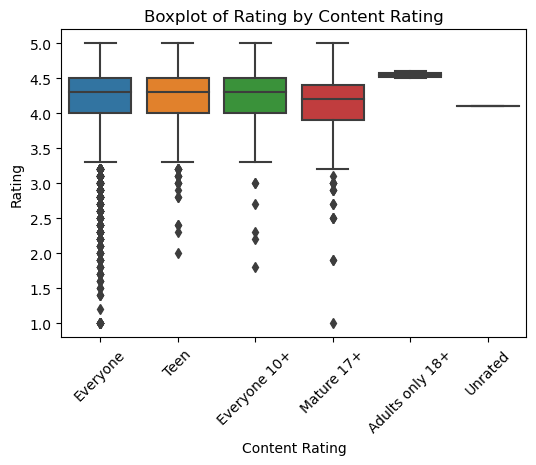

In [642]:
# Make boxplot for Rating vs. Content Rating
# Is there any difference in the ratings? Are some types liked better?

# Create a boxplot for 'Rating' vs. 'Content Rating'
plt.figure(figsize=(6, 4))  # Optional: Adjust the figure size
sns.boxplot(x='Content Rating', y='Rating', data=df)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.title('Boxplot of Rating by Content Rating')

# Display the plot
plt.show()

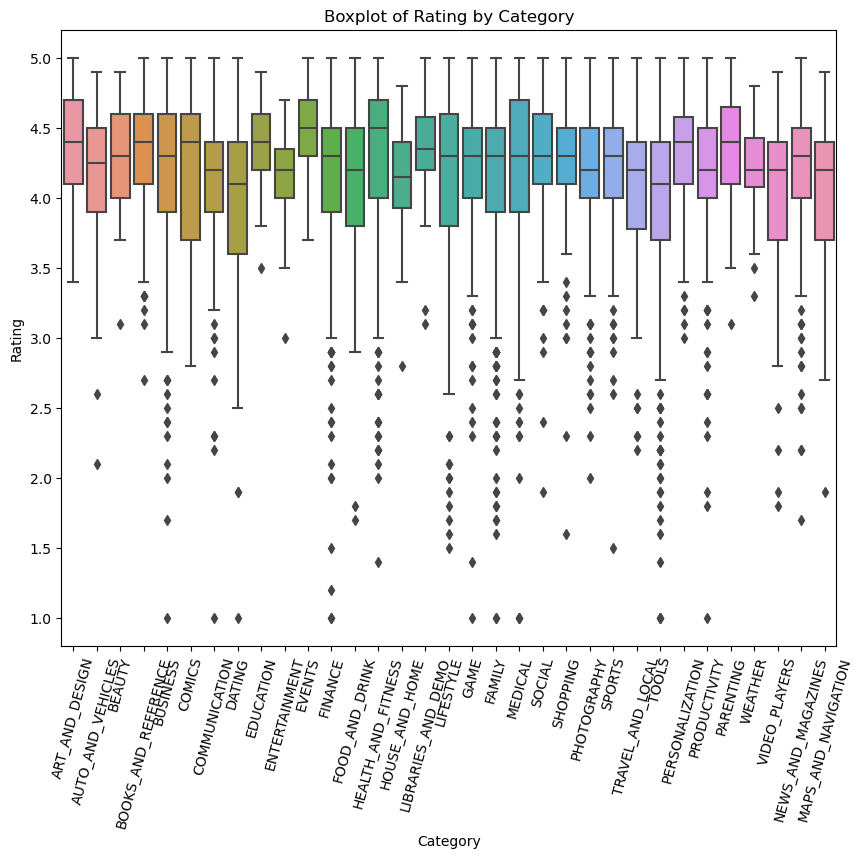

In [643]:
# Make boxplot for Ratings vs. Category
# Which genre has the best ratings?
# Create a boxplot for 'Rating' vs. 'Content Rating'
plt.figure(figsize=(10, 8))  # Optional: Adjust the figure size
sns.boxplot(x='Category', y='Rating', data=df)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=75)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Boxplot of Rating by Category')

# Display the plot
plt.show()

For each of the plots above, note down your observation.

8. Data Preprocessing:

We need to start by copying our dataset and name it inp1

In [644]:
#create a copy of the dataframe to make all the edits. Name it inp1.
inp1 = df.copy()

In [645]:
inp1

,App,Category,Rating,Reviews,Size(K),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2300,100000,Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up
10834,FR Calculator,FAMILY,4.0,7,2600,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [646]:
# Apply log transformation to 'Review' and 'Installs' using numpy library
import numpy as np
inp1['Reviews_log'] = np.log(inp1['Reviews'])
inp1['Installs_log'] = np.log(inp1['Installs'])


In [647]:
inp1.head()

,App,Category,Rating,Reviews,Size(K),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_log,Installs_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,5.068904,9.210340
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,6.874198,13.122363
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,11.379508,15.424948
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,6.874198,11.512925
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,5.117994,10.819778


In [648]:
# Drop columns 'Reviews', 'Installs'
columns_to_drop = ['Reviews', 'Installs']
inp1 = inp1.drop(columns=columns_to_drop)


In [649]:
inp1

,App,Category,Rating,Size(K),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_log,Installs_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,5.068904,9.210340
1,Coloring book moana,ART_AND_DESIGN,3.9,14000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,6.874198,13.122363
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8700,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,11.379508,15.424948
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2800,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,6.874198,11.512925
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5600,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,5.117994,10.819778
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,2300,Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up,6.781058,11.512925
10834,FR Calculator,FAMILY,4.0,2600,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,1.945910,6.214608
10836,Sya9a Maroc - FR,FAMILY,4.5,53000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,3.637586,8.517193
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,3600,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,1.386294,4.605170


Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [650]:
# Drop columns 'App', 'Last Updated','Current Ver','Android Ver'
columns_to_drop = ['App', 'Last Updated','Current Ver','Android Ver']
inp1 = inp1.drop(columns=columns_to_drop)

In [651]:
inp1

,Category,Rating,Size(K),Type,Price,Content Rating,Genres,Reviews_log,Installs_log
0,ART_AND_DESIGN,4.1,19000,Free,0,Everyone,Art & Design,5.068904,9.210340
1,ART_AND_DESIGN,3.9,14000,Free,0,Everyone,Art & Design;Pretend Play,6.874198,13.122363
2,ART_AND_DESIGN,4.7,8700,Free,0,Everyone,Art & Design,11.379508,15.424948
4,ART_AND_DESIGN,4.3,2800,Free,0,Everyone,Art & Design;Creativity,6.874198,11.512925
5,ART_AND_DESIGN,4.4,5600,Free,0,Everyone,Art & Design,5.117994,10.819778
...,...,...,...,...,...,...,...,...,...
10830,NEWS_AND_MAGAZINES,3.8,2300,Free,0,Everyone,News & Magazines,6.781058,11.512925
10834,FAMILY,4.0,2600,Free,0,Everyone,Education,1.945910,6.214608
10836,FAMILY,4.5,53000,Free,0,Everyone,Education,3.637586,8.517193
10837,FAMILY,5.0,3600,Free,0,Everyone,Education,1.386294,4.605170


Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

To create a linear regression model to predict ratings from a dataset with both numerical and categorical columns, you can use one-hot encoding to handle the categorical variables. One-hot encoding converts categorical variables into a format that can be used in regression models. 

In [481]:
#Identifying the categorical columns (e.g., Category, Type, Content Rating, Genres).
# get dommy columns by Apply one-hot encoding to categorical columns
inp2 = pd.get_dummies(inp1, columns=['Category', 'Type', 'Content Rating','Genres'])

In [652]:
inp2.head()

,Rating,Size(K),Price,Reviews_log,Installs_log,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,19000,0,5.068904,9.210340,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,14000,0,6.874198,13.122363,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,8700,0,11.379508,15.424948,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,2800,0,6.874198,11.512925,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5600,0,5.117994,10.819778,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


9 .  Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

10 . Separate the dataframes into X_train, y_train, X_test, and y_test.

In [653]:
from sklearn.model_selection import train_test_split

# Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.
# Separate the dataframes into X_train, y_train, X_test, and y_test.

X = inp2.drop('Rating', axis=1)  # Features (all columns except 'Rating')
y = inp2['Rating']  # Target variable ('Rating')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


11 . Model building

In [655]:
# Use linear regression as the technique

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = model.predict(X_train)

# Calculate R-squared on the training data
r_squared = r2_score(y_train, y_train_pred)


In [656]:
# Report the R-squared value - Report the R2 on the train set
print(f"R-squared on the train set: {r_squared:.2f}")

R-squared on the train set: 0.16


In [658]:
#  Make predictions on test set and report R2.
# Predict on the test data
y_test_pred = model.predict(X_test)

# Calculate R-squared on the test data
r_squared_test = r2_score(y_test, y_test_pred)

# Report the R-squared value on the test set
print(f"R-squared on the test set: {r_squared_test:.2f}")

R-squared on the test set: 0.13
